KNN Classifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


0.9444444444444444

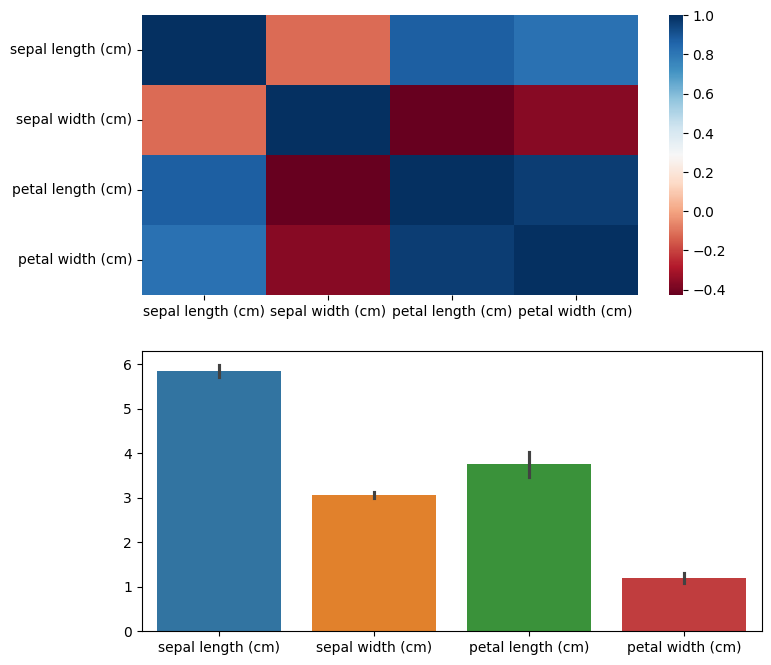

In [59]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
X = data.data
y = data.target

df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(10)
df.info()

corr = df.corr()
fig, axes = plt.subplots(2,1, figsize=(8,8))
plt.subplot(2,1,1)
sns.heatmap(corr, cmap="RdBu")
plt.subplot(2,1,2)
sns.barplot(df)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

LWR

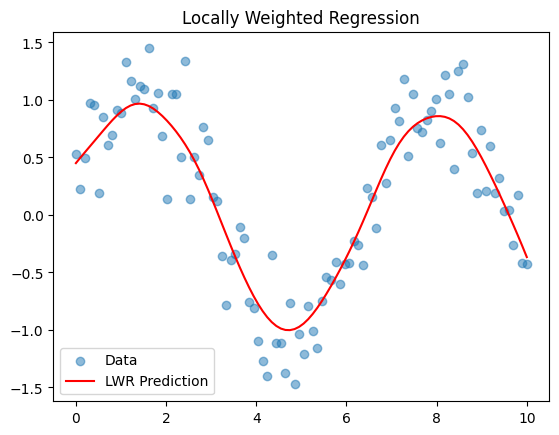

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = np.sin(X) + 0.3 * np.random.randn(100)

def lwr_predict(x_query, X, y, tau):
    """Locally Weighted Regression prediction for a single query point."""
    m = X.shape[0]
    weights = np.exp(- (X - x_query)**2 / (2 * tau**2))
    W = np.diag(weights)
    X_ = np.vstack([np.ones(m), X]).T
    theta = np.linalg.pinv(X_.T @ W @ X_) @ (X_.T @ W @ y)
    return np.array([1, x_query]) @ theta

# Predict for all points
tau = 0.5  # Bandwidth parameter
y_pred = np.array([lwr_predict(x, X, y, tau) for x in X])

# Plot
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X, y_pred, color='red', label='LWR Prediction')
plt.legend()
plt.title('Locally Weighted Regression')
plt.show()

Regression

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2, mse

(0.61768468178291, 0.5098109045448715)

Polynomial Regression

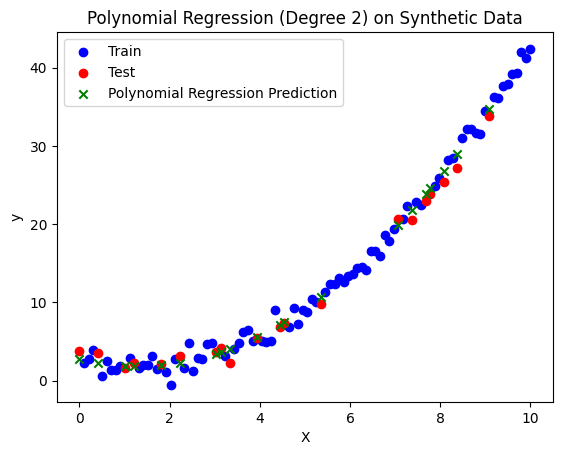

Model Coefficients: [ 0.         -1.4467539   0.54542609]
Model Intercept: 2.825232922619179
Test R^2 Score: 0.991878312024436


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate a synthetic nonlinear dataset
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 0.5 * X**2 - X + 2 + np.random.randn(100)  # Quadratic relationship with noise
X = X.reshape(-1, 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Polynomial Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# Plot results
plt.scatter(X_train, y_train, color='blue', label='Train')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.scatter(X_test, y_pred, color='green', label='Polynomial Regression Prediction', marker='x')
plt.title('Polynomial Regression (Degree 2) on Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Test R^2 Score:", model.score(X_test_poly, y_test))

Decision Tree classfier

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

df = pd.read_csv("./datasets/zoo.csv")

df.head()

X = df.drop('class_type', axis = 1)
y = df['class_type']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred  = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9523809523809523

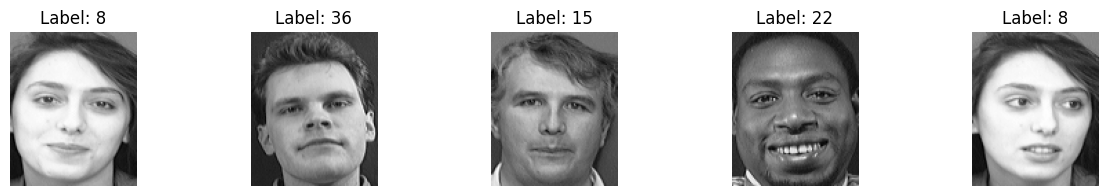

<Axes: >

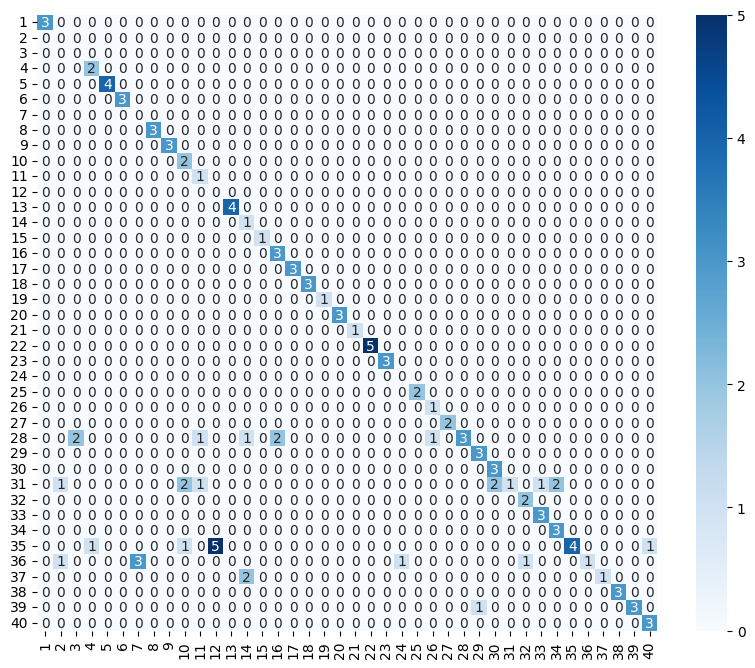

In [19]:
from sklearn.naive_bayes import GaussianNB
# from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "D:/PPMLA/datasets/OlivettiDataset"

images = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        img_path = dataset_path+ f'/s{i}'+ f'/{j}.pgm'
        img = Image.open(img_path).convert('L')
        images.append(np.array(img))
        labels.append(i)

images = np.array(images)
labels = np.array(labels)

indices = np.arange(len(images))
np.random.shuffle(indices)

images = images[indices]
labels = labels[indices]

fig, axes = plt.subplots(1,5, figsize = (15,2))
for i, ax in enumerate(axes):
    ax.imshow(images[i], cmap="gray")
    ax.set_title(f'Label: {labels[i]}')
    ax.axis("off")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

nb = GaussianNB()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(1, 41), yticklabels=np.arange(1, 41))

In [20]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load data
data = fetch_olivetti_faces()
X = data.images.reshape((len(data.images), -1))  # Flatten images
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANN model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

print("Test accuracy:", mlp.score(X_test, y_test))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Admin\scikit_learn_data


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976027
  warnings.warn(f"Retry downloading from url: {remote.url}")


Test accuracy: 0.8


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
